# Hands-on notes

## part 1 - load and loop over data

In [3]:
from ctapipe.io import event_source
from ctapipe import utils
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
data = utils.get_dataset_path("gamma_test.simtel.gz")
source = event_source(data, max_events=5)

In [5]:
for event in source:
    print(event.count, event.r0.event_id, event.mc.energy)

0 408 0.3820943236351013 TeV
1 409 0.3820943236351013 TeV
2 803 0.2217816561460495 TeV
3 4907 0.06210866943001747 TeV
4 9508 0.06830974668264389 TeV


In [6]:
event

ctapipe.io.containers.DataContainer:
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                          mc.*: Monte-Carlo data
                    mcheader.*: Monte-Carlo run header data
                        trig.*: central trigger information
                         count: number of events processed
                        inst.*: instrumental information (deprecated
                   pointing[*]: Telescope pointing positions

In [7]:
event.r0

ctapipe.io.containers.R0Container:
                        obs_id: observation ID
                      event_id: event id number
                tels_with_data: list of telescopes with data
                        tel[*]: map of tel_id to R0CameraContainer

In [8]:
for event in source:
    print(event.count, event.r0.tels_with_data)

0 {38, 47}
1 {11, 21, 118, 119, 24, 26, 61, 63}
2 {104, 17, 124}
3 {1, 2, 4, 14, 15, 17, 19}
4 {2, 3, 4, 10, 12, 25}


In [9]:
event.r0.tel[2]

ctapipe.io.containers.R0CameraContainer:
                  trigger_time: Telescope trigger time, start of waveform
                                readout, None for MCs
                  trigger_type: camera's event trigger type if applicable
                         image: numpy array containing integrated ADC data
                                (n_channels x n_pixels) DEPRECATED
                      waveform: numpy array containing ADC samples(n_channels x
                                n_pixels, n_samples)
                   num_samples: number of time samples for telescope

In [10]:
r0tel = event.r0.tel[2]

In [11]:
r0tel.waveform

array([[[ 97,  96,  96, ...,  93,  87,  92],
        [105, 103, 106, ...,  96, 100, 103],
        [106,  98,  93, ..., 113, 104,  97],
        ..., 
        [109, 100, 101, ..., 100,  97,  94],
        [106, 111, 103, ..., 100, 105, 108],
        [100,  95,  89, ..., 118, 114,  99]]], dtype=uint16)

In [12]:
r0tel.waveform.shape

(1, 1855, 30)

note that this is (N_chan, N_pix, N_samp)

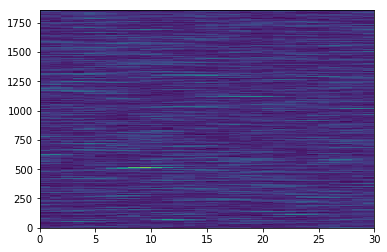

In [13]:
plt.pcolormesh(r0tel.waveform[0])

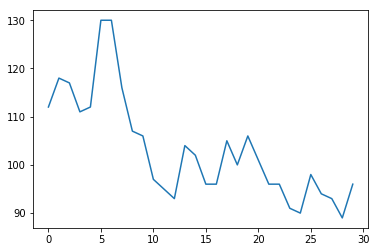

In [14]:
plt.plot(r0tel.waveform[0,10])

In [15]:
from ipywidgets import interact

@interact
def view_waveform(chan=0, pix_id=200):
    plt.plot(r0tel.waveform[chan, pix_id])

interactive(children=(IntSlider(value=0, description='chan', max=1), IntSlider(value=200, description='pix_id', max=600, min=-200), Output()), _dom_classes=('widget-interact',))

try making this compare 2 waveforms

## Looking at instrument info
This is all well and good, but we don't really know what camera or telescope this is... how do we get instrumental description info?

Currently this is returned *inside* the event (it will soon change to be separate in next version or so)

In [16]:
subarray = event.inst.subarray  # soon EventSource will give you event, subarray separate

In [17]:
subarray

SubarrayDescription(name='MonteCarloArray', num_tels=126)

/Users/kosack/Projects/CTA/Working/ctapipe/ctapipe/instrument/subarray.py:118: UserWarning: SubarrayDescription.pos_x is deprecated. Use tel_coords.x
  warnings.warn("SubarrayDescription.pos_x is deprecated. Use "
/Users/kosack/Projects/CTA/Working/ctapipe/ctapipe/instrument/subarray.py:125: UserWarning: SubarrayDescription.pos_y is deprecated. Use tel_coords.y
  warnings.warn("SubarrayDescription.pos_y is deprecated. Use "


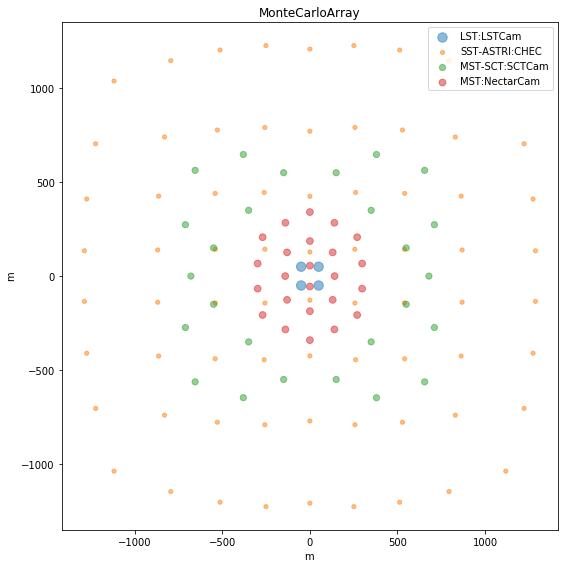

In [18]:
subarray.peek()

In [19]:
subarray.to_table()

tel_id,tel_pos_x,tel_pos_y,tel_pos_z,tel_type,tel_subtype,mirror_type,camera_type,tel_description
,m,m,m,,,,,
int16,float64,float64,float64,str3,str5,str2,str9,str14
1,50.0,50.0,16.0,LST,,DC,LSTCam,LST:LSTCam
2,-50.0,50.0,16.0,LST,,DC,LSTCam,LST:LSTCam
3,50.0,-50.0,16.0,LST,,DC,LSTCam,LST:LSTCam
4,-50.0,-50.0,16.0,LST,,DC,LSTCam,LST:LSTCam
5,141.100006104,0.0,10.0,MST,,DC,NectarCam,MST:NectarCam
6,-141.100006104,0.0,10.0,MST,,DC,NectarCam,MST:NectarCam
7,0.0,55.4000015259,10.0,MST,,DC,NectarCam,MST:NectarCam
8,298.399993896,66.9000015259,10.0,MST,,DC,NectarCam,MST:NectarCam


In [20]:
subarray.tel[2]

TelescopeDescription(optics=LST, camera=LSTCam)

In [21]:
subarray.tel[2].camera

CameraGeometry(cam_id='LSTCam', pix_type='hexagonal', npix=1855, cam_rot=0.0 deg, pix_rot=100.893 deg)

In [22]:
subarray.tel[2].optics

OpticsDescription(tel_type='LST', tel_subtype='')

In [23]:
tel = subarray.tel[2]

In [24]:
tel.camera.info()

CameraGeometry: "LSTCam"
   - num-pixels: 1855
   - pixel-type: hexagonal
   - sensitive-area: 4.016016000618191 m2
   - pix-rotation: 100.893 deg
   - cam-rotation: 0.0 deg


In [25]:
tel.optics.info()

OpticsDescription: "LST"
    - mirror_type: DC
    - num_mirror_tiles: 198
    - mirror_area: 386.7515563964844 m2


In [26]:
tel.camera.pix_x

<Quantity [ 0.        ,-0.00944877,-0.0472442 ,..., -0.6519913 ,
           -0.6141959 ,-0.62364467] m>

In [27]:
tel.camera.to_table()

pix_id,pix_x,pix_y,pix_area
,m,m,m2
int64,float64,float64,float64
0,0.0,0.0,0.0021649681944
1,-0.00944877377532,0.0490990911184,0.0021649681944
2,-0.047244198267,0.016366907764,0.0021649681944
3,-0.0377954244917,-0.0327321833543,0.0021649681944
4,0.00944877377532,-0.0490990911184,0.0021649681944
5,0.047244198267,-0.016366907764,0.0021649681944
6,0.0377954244917,0.0327321833543,0.0021649681944
7,0.0661417454657,-0.114565088172,0.0021649681944


In [28]:
tel.optics.mirror_area

<Quantity 386.7515563964844 m2>

In [29]:
from ctapipe.visualization import CameraDisplay

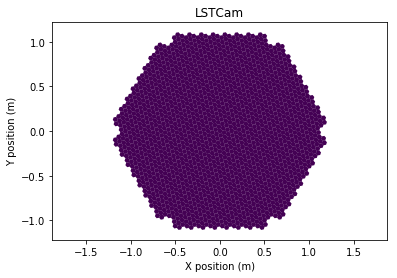

In [30]:
disp = CameraDisplay(tel.camera)

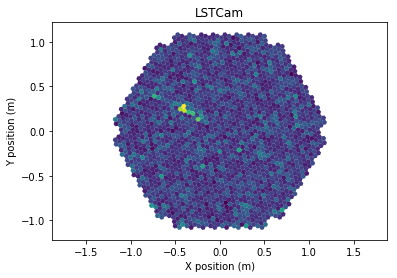

In [31]:
disp = CameraDisplay(tel.camera)
disp.image = r0tel.waveform[0,:,10]  # display channel 0, sample 0 (try others like 10)

 ** aside: ** show demo using a CameraDisplay in interactive mode in ipython rather than notebook

## Part 2, working with calibrated data...

In [32]:
from ctapipe.calib import CameraCalibrator

In [33]:
calib = CameraCalibrator(eventsource=source)

In [39]:
for event in source:
    calib.calibrate(event) # fills in r1, dl0, and dl1
    print(event.dl1.tel.keys())

dict_keys([38, 47])
dict_keys([11, 21, 118, 119, 24, 26, 61, 63])
dict_keys([104, 17, 124])
dict_keys([1, 2, 4, 14, 15, 17, 19])
dict_keys([2, 3, 4, 10, 12, 25])


In [40]:
event.dl1.tel[2]

ctapipe.io.containers.DL1CameraContainer:
                         image: np array of camera image, after waveform
                                integration (N_pix)
                  gain_channel: boolean numpy array of which gain channel was
                                used for each pixel in the image
             extracted_samples: numpy array of bools indicating which samples
                                were included in the charge extraction as a
                                result of the charge extractor chosen.
                                Shape=(nchan, npix, nsamples).
                       peakpos: numpy array containing position of the peak as
                                determined by the peak-finding algorithm for
                                each pixel
                       cleaned: numpy array containing the waveform after
                                cleaning

In [41]:
dl1tel = event.dl1.tel[2]

In [44]:
dl1tel.image.shape # note this will be gain-selected in next version, so will be just 1D array of 1855

(1, 1855)

In [46]:
dl1tel.peakpos

array([[26, 26, 29, ..., 10, 27,  0]])

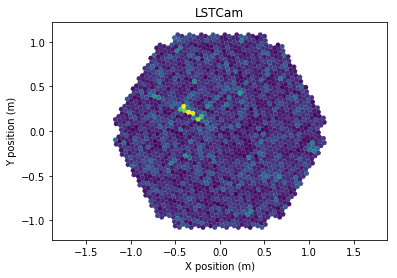

In [52]:
CameraDisplay(tel.camera, image=dl1tel.image[0])

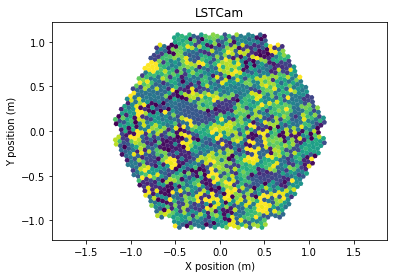

In [51]:
CameraDisplay(tel.camera, image=dl1tel.peakpos[0])

Now for Hillas Parameters

In [53]:
from ctapipe.image import hillas_parameters, tailcuts_clean

In [75]:
image = dl1tel.image[0]
mask = tailcuts_clean(tel.camera, image, picture_thresh=10, boundary_thresh=5)
mask

array([False, False, False, ..., False, False, False], dtype=bool)

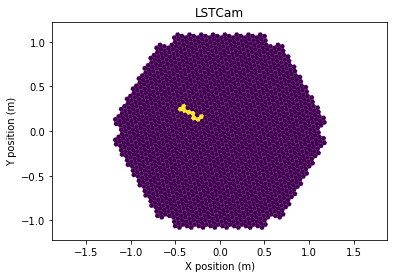

In [76]:
CameraDisplay(tel.camera, image=mask)

In [77]:
cleaned = image.copy()
cleaned[~mask] = 0 

(0, 1.0)

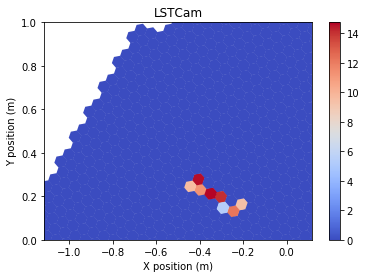

In [110]:
disp = CameraDisplay(tel.camera, image=cleaned)
disp.cmap = plt.cm.coolwarm
disp.add_colorbar()
plt.xlim(-1.0,0)
plt.ylim(0,1.0)

In [92]:
params = hillas_parameters(tel.camera, cleaned)
print(params)

MomentParameters(size=91.438229046890626, cen_x=<Quantity -0.33533114591643126 m>, cen_y=<Quantity 0.20629716819762037 m>, length=<Quantity 0.08624135770109215 m>, width=<Quantity 0.01909559270070122 m>, r=<Quantity 0.39370737741117345 m>, phi=<Angle 2.5900684568043504 rad>, psi=<Angle 2.6029933609888367 rad>, miss=<Quantity 0.005088488452335615 m>, skewness=-0.19606931097850142, kurtosis=1.6293572561316156)


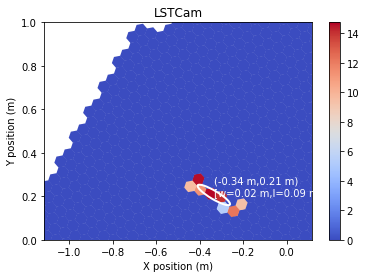

In [108]:
disp = CameraDisplay(tel.camera, image=cleaned)
disp.cmap = plt.cm.coolwarm
disp.add_colorbar()
plt.xlim(-1.0,0)
plt.ylim(0,1.0)
disp.overlay_moments(params, color='white', lw=2)

## Part 3:  Let's put it all together: 
- loop over events, selecting only telescopes of the same type (e.g. LST:LSTCam)
- for each event, apply calibration/trace integration
- calculate Hillas parameters 
- write out all hillas paremeters to a file that can be loaded with Pandas

first let's select only those telescopes with LST:LSTCam

In [114]:
subarray.telescope_types

['LST:LSTCam', 'SST-ASTRI:CHEC', 'MST-SCT:SCTCam', 'MST:NectarCam']

In [118]:
subarray.get_tel_ids_for_type("LST:LSTCam")

[1, 2, 3, 4]

Now let's write out program

In [144]:
data = utils.get_dataset("gamma_test_large.simtel.gz")
source = event_source(data, allowed_tels=[1,2,3,4])

In [152]:
for event in source:
    calib.calibrate(event)
    
    for tel_id, tel_data in event.dl1.tel.items():
        tel = event.inst.subarray.tel[tel_id]
        mask = tailcuts_clean(tel.camera, tel_data.image[0])
        #params = hillas_parameters(tel.camera[mask], tel_data.image[0][mask])
        #print(params)
        params = hillas_parameters(tel.camera[mask], tel_data.image[0][mask])
        #print(params)

/Users/kosack/Projects/CTA/Working/ctapipe/ctapipe/image/hillas.py:571: RuntimeWarning: invalid value encountered in sqrt
  width = np.sqrt((vy2 + vx2 - z) / 2.0)


In [146]:
from ctapipe.io import HDF5TableWriter


In [147]:
with HDF5TableWriter(filename='hillas.h5', group_name='dl1', overwrite=True) as writer:
    
    for event in source:
        calib.calibrate(event)
    
        for tel_id, tel_data in event.dl1.tel.items():
            tel = event.inst.subarray.tel[tel_id]
            mask = tailcuts_clean(tel.camera, tel_data.image[0])
            params = hillas_parameters(tel.camera[mask], tel_data.image[0][mask])
            writer.write("hillas", params)

/Users/kosack/Projects/CTA/Working/ctapipe/ctapipe/image/hillas.py:571: RuntimeWarning: invalid value encountered in sqrt
  width = np.sqrt((vy2 + vx2 - z) / 2.0)


In [148]:
!ls *.h5

hillas.h5  images.h5  tableimages.h5  toymodel.h5


In [149]:
import pandas as pd

hillas = pd.read_hdf("hillas.h5")
hillas

,intensity,kurtosis,length,phi,psi,r,skewness,width,x,y
0,516.973096,2.002860,0.241504,158.337072,-116.961854,1.044776,-0.306567,4.722307e-02,-0.970985,0.385674
1,12351.141036,3.896901,0.257008,131.028596,102.750279,0.832273,-1.061792,1.143911e-01,-0.546333,0.627852
2,104.850083,5.350268,0.321235,46.050520,88.237061,0.812167,-2.056825,2.475438e-02,0.563663,0.584721
3,111.341096,2.111895,0.050280,69.051947,79.696707,0.960495,0.138985,2.288178e-02,0.343397,0.897011
4,92.755469,5.135449,0.217182,121.504415,80.614031,0.900817,-1.966423,2.140994e-02,-0.470735,0.768036
5,50.130124,2.315119,0.202210,131.986592,144.151365,0.837480,-1.100839,1.669234e-02,-0.560238,0.622500
6,156.264460,5.088021,0.107545,165.353912,-139.957560,1.044461,-1.325198,3.576984e-02,-1.010522,0.264090
7,276.659170,2.732760,0.061533,-178.204001,166.296148,1.008144,-0.437843,4.703201e-02,-1.007649,-0.031596
8,103.223940,4.999805,0.415818,167.280745,-164.380023,0.673766,-1.959706,3.354586e-02,-0.657232,0.148346
9,127.519560,3.931853,0.170866,169.053329,-142.512234,1.087187,-1.390420,2.921024e-02,-1.067405,0.206452


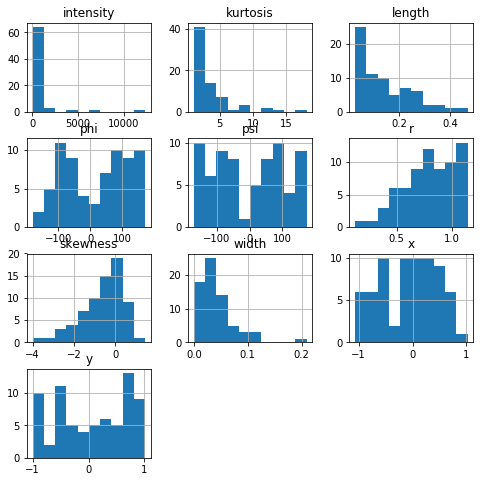

In [150]:
_ = hillas.hist(figsize=(8,8))